In [151]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [152]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [153]:
# reflect an existing database into a new model
Base = automap_base()

In [154]:
# reflect the tables  
Base.prepare(engine, reflect=True)

In [155]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [156]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [157]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [158]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first() 
print(f"Last Day:", last_date)

Last Day: ('2017-08-23',)


In [159]:
# Calculate the date 1 year ago from the last data point in the database
first_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f"First Day:", first_date)

First Day: 2016-08-23


In [160]:
# Perform a query to retrieve the data and precipitation scores
measurement_data = (Measurement.date, Measurement.prcp)
prcp_data = session.query(*measurement_data).filter(Measurement.date >= first_date).all()
prcp_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [161]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data, columns = ["date", "prcp"])
df.set_index("date", inplace=True)

In [162]:
# Sort the dataframe by date
precip_df = df.sort_values(["date"])
precip_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


/Users/buckleyweglarz/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


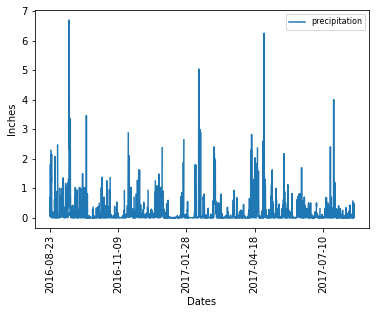

In [176]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precip_df.plot(rot=90)    #bar(figsize=(16,8), width=24)
plt.xlabel("Dates") 
#ax.set_xticklabels([]) 
plt.ylabel("Inches") 
plt.legend(['precipitation'], fontsize=8)
#plt.show() 

In [177]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [178]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count()
print(f"Number Of Stations:", station_count)

Number Of Stations: 9


In [197]:
# List the stations and the counts in descending order.
station_list = session.query(Measurement.station, func.count(Measurement.date)).\
group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [187]:
# What are the most active stations? (i.e. what stations have the most rows)?
print(f"USC00519281 has the higest number of observations")

USC00519281 has the higest number of observations


In [205]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station== 'USC00519281').all()


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data fo

In [ ]:
#Flask setup
app = Flask(__name__)

#Flask routes
@app.route("/")
def welcome():
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>""
